In [1]:
import os
import pandas as pd 
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [2]:
# 현재경로 확인

os.getcwd()

'C:\\Study\\Python_Study\\ByteDegree_MachineLearning'

In [3]:
# 데이터 불러오기

corolla = pd.read_csv("./data/ToyotaCorolla.csv")
corolla.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [5]:
# 데이터 수와 변수의 수 확인하기

nCar = corolla.shape[0]
nVar = corolla.shape[1]
print('nCar: %d' % nCar, 'nVar: %d' % nVar )

nCar: 1436 nVar: 37


## 범주형 변수를 이진형 변수로 변환

In [9]:
# 가변수 생성

corolla.Fuel_Type.unique()
dummy_p = np.repeat(0,nCar)
dummy_d = np.repeat(0,nCar)
dummy_c = np.repeat(0,nCar)

In [83]:
dummy_p

array([0, 0, 0, ..., 0, 0, 0])

In [10]:
# 연료타입에 대한 위치 인덱스를 저장  

p_idx = np.array(corolla.Fuel_Type == "Petrol")
d_idx = np.array(corolla.Fuel_Type == "Diesel")
c_idx = np.array(corolla.Fuel_Type == "CNG")

In [11]:
p_idx

array([False, False, False, ...,  True,  True,  True])

In [12]:
# 인덱스 슬라이싱 후 (binary = 1) 대입

dummy_p[p_idx] = 1  # Petrol
dummy_d[d_idx] = 1  # Diesel
dummy_c[c_idx] = 1  # CNG

In [13]:
dummy_d

array([1, 1, 1, ..., 0, 0, 0])

## 불필요한 변수 제거 및 가변수 추가


In [15]:
# np or dict to DF

Fuel = pd.DataFrame({'Petrol': dummy_p, 'Diesel': dummy_d, 'CNG': dummy_c})

# column slice

corolla_ = corolla.dropna().drop(['Id','Model','Fuel_Type'], axis=1, inplace=False)
mlr_data = pd.concat((corolla_, Fuel), 1)

In [16]:
Fuel

,Petrol,Diesel,CNG
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
1431,1,0,0
1432,1,0,0
1433,1,0,0
1434,1,0,0


In [18]:
corolla_ = corolla.drop(['Id', 'Model', 'Fuel_Type'], axis = 1, inplace = False)
mlr_data = pd.concat((corolla_, Fuel), 1)

In [19]:
mlr_data.head()

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Petrol,Diesel,CNG
0,13500,23,10,2002,46986,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
1,13750,23,10,2002,72937,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
2,13950,24,9,2002,41711,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
3,14950,26,7,2002,48000,90,0,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
4,13750,30,3,2002,38500,90,0,0,2000,3,...,0,1,0,1,0,0,0,0,1,0


In [20]:
# bias 추가

mlr_data = sm.add_constant(mlr_data, has_constant='add')
mlr_data.head()

,const,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Petrol,Diesel,CNG
0,1.0,13500,23,10,2002,46986,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
1,1.0,13750,23,10,2002,72937,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
2,1.0,13950,24,9,2002,41711,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
3,1.0,14950,26,7,2002,48000,90,0,0,2000,...,0,0,0,1,0,0,0,0,1,0
4,1.0,13750,30,3,2002,38500,90,0,0,2000,...,0,1,0,1,0,0,0,0,1,0


## 설명변수(X), 타켓변수(Y) 분리 및 학습데이터와 평가데이터 분할

In [21]:
feature_columns = list(mlr_data.columns.difference(['Price']))

X = mlr_data[feature_columns]
y = mlr_data.Price
train_x, test_x, train_y, test_y = train_test_split(X, y, train_size=0.7, test_size=0.3)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1005, 37) (431, 37) (1005,) (431,)


In [22]:
# Train the MLR / 회귀모델적합

full_model = sm.OLS(train_y, train_x)
fitted_full_model = full_model.fit()

In [23]:
# R2가 높고, 대부분의 변수들이 유의

fitted_full_model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     344.1
Date:                Thu, 17 Dec 2020   Prob (F-statistic):               0.00
Time:                        15:49:00   Log-Likelihood:                -8394.5
No. Observations:                1005   AIC:                         1.686e+04
Df Residuals:                     971   BIC:                         1.702e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ABS                -63.2338    131.342     -0.481      0.630    -320.980     194.513
Age_08_04         -109.6459      3.814    -28.749      0.000    -117.130    -102.161
Airbag_1          -129.3426    276.664     -0.468      0.640    -672.270     413.585
Airbag_2          -145.9356    133.002     -1.097      0.273    -406.940     115.069
Airco              278.2351     89.239      3.118      0.002     103.111     453.359
Automatic           31.7144    150.520      0.211      0.833    -263.667     327.096
Automatic_airco   1995.6861    193.944     10.290      0.000    1615.089    2376.283
BOVAG_Guarantee    674.1426    122.478      5.504      0.000     433.791     914.494
Backseat_Divider  -269.1453    131.930     -2.040      0.042    -528.047     -10.244
Boardcomputer     -202.0601    115.373     -1.751      0.080    -428.469      24.349
CD_Player          153.0421     96.151      1.592      0.112     -35.645     341.730
CNG              -1244.1580    240.762     -5.168      0.000   -1716.632    -771.684
Central_Lock       -63.3255    149.966     -0.422      0.673    -357.621     230.970
Cylinders           -0.0427      0.003    -16.547      0.000      -0.048      -0.038
Diesel             183.2459    319.578      0.573      0.567    -443.897     810.389
Doors             -122.4756     42.359     -2.891      0.004    -205.601     -39.350
Gears               37.5224    196.227      0.191      0.848    -347.555     422.600
Guarantee_Period    67.0900     15.032      4.463      0.000      37.591      96.589
HP                  25.9660      6.076      4.274      0.000      14.043      37.889
KM                  -0.0147      0.001    -11.494      0.000      -0.017      -0.012
Met_Color           18.6132     75.584      0.246      0.806    -129.714     166.940
Metallic_Rim       191.6854     93.874      2.042      0.041       7.467     375.904
Mfg_Month          -99.4184     10.271     -9.680      0.000    -119.573     -79.263
Mfg_Year            -3.9720      1.060     -3.746      0.000      -6.053      -1.891
Mfr_Guarantee      291.2993     73.948      3.939      0.000     146.183     436.416
Mistlamps          -47.2036    107.861     -0.438      0.662    -258.871     164.464
Petrol            1060.9014    234.608      4.522      0.000     600.504    1521.299
Power_Steering     -13.6803    329.370     -0.042      0.967    -660.039     632.678
Powered_Windows    319.0397    150.066      2.126      0.034      24.549     613.531
Quarterly_Tax       12.8548      1.804      7.125      0.000       9.314      16.395
Radio             1481.7857    759.274      1.952      0.051      -8.222    2971.793
Radio_cassette   -1608.9944    756.783     -2.126      0.034   -3094.113    -123.875
Sport_Model         75.7369     91.419      0.828      0.408    -103.665     255.139
Tow_Bar           -138.

## VIF를 통한 다중공선성 확인 

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    mlr_data.values, i) for i in range(mlr_data.shape[1])]
vif["features"] = mlr_data.columns
vif

C:\Users\blahb\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1685: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\blahb\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,0.000000,const
1,10.953474,Price
2,inf,Age_08_04
3,inf,Mfg_Month
4,inf,Mfg_Year
5,2.400334,KM
6,2.621514,HP
7,1.143778,Met_Color
8,1.121303,Automatic
9,1.258641,cc


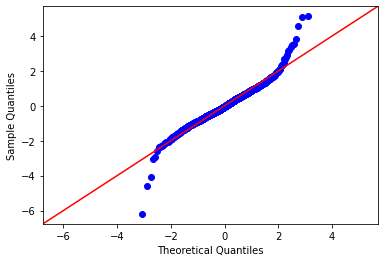

In [25]:
# 학습데이터의 잔차 확인

res = fitted_full_model.resid  # residual
pred_y=fitted_full_model.predict(train_x)

# q-q plot # 정규분포 확인

fig = sm.qqplot(res, fit=True, line='45')

Text(0, 0.5, 'Residual')

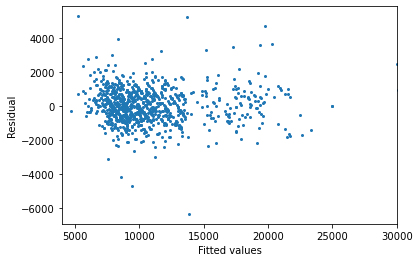

In [27]:
# residual pattern 확인

pred_y = fitted_full_model.predict(train_x)
import matplotlib.pyplot as plt
fig = plt.scatter(pred_y,res, s=4)
plt.xlim(4000,30000)
plt.xlim(4000,30000)
plt.xlabel('Fitted values')
plt.ylabel('Residual')

In [34]:
# 검증 데이터에 대한 예측 

pred_y2 = fitted_full_model.predict(test_x) 

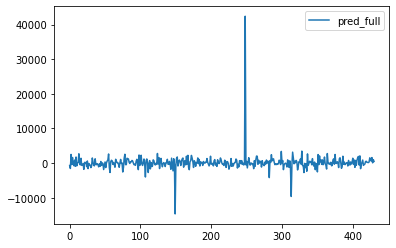

In [35]:
# 잔차 plot

plt.plot(np.array(test_y-pred_y),label="pred_full")
plt.legend()
plt.show()

In [36]:
from sklearn.metrics import mean_squared_error

In [37]:
# MSE 성능

mean_squared_error(y_true= test_y, y_pred= pred_y2)

6012206.223381578

## 변수선택법

In [38]:
def processSubset(X,y, feature_set):
            model = sm.OLS(y,X[list(feature_set)]) # Modeling
            regr = model.fit() # 모델 학습
            AIC = regr.aic # 모델의 AIC
            return {"model":regr, "AIC":AIC}
        
print(processSubset(X=train_x, y=train_y, feature_set = feature_columns[0:5]))

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001ED2D5C3DC0>, 'AIC': 19083.89847251874}


In [39]:
processSubset(X=train_x, y=train_y, feature_set = feature_columns)


{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x1ed2cadd9d0>,
 'AIC': 16856.97918634596}

In [40]:
import time
import itertools
# getBest: 가장 낮은 AIC를 가지는 모델 선택 및 저장
# k 는 변수의 수

def getBest(X,y,k):
    tic = time.time() # 시작시간
    results = [] # 결과 저장공간
    for combo in itertools.combinations(X.columns.difference(['const']), k): # 각 변수조합을 고려한 경우의 수
        combo=(list(combo)+['const'])
        
        results.append(processSubset(X,y,feature_set=combo))  # 모델링된 것들을 저장
    models = pd.DataFrame(results) # 데이터 프레임으로 변환
    # 가장 낮은 AIC를 가지는 모델 선택 및 저장
    best_model = models.loc[models['AIC'].argmin()] # index
    toc = time.time() # 종료시간
    print("Processed ", models.shape[0], "models on", k, "predictors in", (toc - tic),
          "seconds.")
    return best_model

print(getBest(X=train_x, y=train_y,k=2))

Processed  630 models on 2 predictors in 0.6851682662963867 seconds.
model    <statsmodels.regression.linear_model.Regressio...
AIC                                                17572.2
Name: 211, dtype: object


In [42]:
for combo in itertools.combinations(X.columns.difference(['const']), 2):
    print((list(combo)+['const']))

['ABS', 'Age_08_04', 'const']
['ABS', 'Airbag_1', 'const']
['ABS', 'Airbag_2', 'const']
['ABS', 'Airco', 'const']
['ABS', 'Automatic', 'const']
['ABS', 'Automatic_airco', 'const']
['ABS', 'BOVAG_Guarantee', 'const']
['ABS', 'Backseat_Divider', 'const']
['ABS', 'Boardcomputer', 'const']
['ABS', 'CD_Player', 'const']
['ABS', 'CNG', 'const']
['ABS', 'Central_Lock', 'const']
['ABS', 'Cylinders', 'const']
['ABS', 'Diesel', 'const']
['ABS', 'Doors', 'const']
['ABS', 'Gears', 'const']
['ABS', 'Guarantee_Period', 'const']
['ABS', 'HP', 'const']
['ABS', 'KM', 'const']
['ABS', 'Met_Color', 'const']
['ABS', 'Metallic_Rim', 'const']
['ABS', 'Mfg_Month', 'const']
['ABS', 'Mfg_Year', 'const']
['ABS', 'Mfr_Guarantee', 'const']
['ABS', 'Mistlamps', 'const']
['ABS', 'Petrol', 'const']
['ABS', 'Power_Steering', 'const']
['ABS', 'Powered_Windows', 'const']
['ABS', 'Quarterly_Tax', 'const']
['ABS', 'Radio', 'const']
['ABS', 'Radio_cassette', 'const']
['ABS', 'Sport_Model', 'const']
['ABS', 'Tow_Bar', 'con

In [43]:
# 변수 선택에 따른 학습시간과 저장

models = pd.DataFrame(columns=["AIC", "model"])
tic = time.time()
for i in range(1,4):
    models.loc[i] = getBest(X=train_x,y=train_y,k=i)
toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed  36 models on 1 predictors in 0.042886972427368164 seconds.
Processed  630 models on 2 predictors in 0.62333083152771 seconds.
Processed  7140 models on 3 predictors in 7.5129075050354 seconds.
Total elapsed time: 8.322741270065308 seconds.


In [44]:
models

,AIC,model
1,17862.045021,<statsmodels.regression.linear_model.Regressio...
2,17572.168629,<statsmodels.regression.linear_model.Regressio...
3,17276.930754,<statsmodels.regression.linear_model.Regressio...


In [45]:
models.loc[3, "model"].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     2293.
Date:                Thu, 17 Dec 2020   Prob (F-statistic):               0.00
Time:                        16:08:41   Log-Likelihood:                -8634.5
No. Observations:                1005   AIC:                         1.728e+04
Df Residuals:                    1001   BIC:                         1.730e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Mfg_Year    1601.7821     32.520     49.255      0.000    1537.966    1665.598
Petrol      3387.3189    165.387     20.481      0.000    3062.774    3711.863
Weight        34.1436      1.217     28.048      0.000      31.755      36.532
const      -3.232e+06   6.43e+04    -50.282      0.000   -3.36e+06   -3.11e+06
==============================================================================
Omnibus:                       84.055   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              436.653
Skew:                          -0.131   Prob(JB):                     1.52e-95
Kurtosis:                       6.218   Cond. No.                     3.54e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.54e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
# 모든 변수들 모델링 한것과 비교 

print("full model Rsquared: ","{:.5f}".format(fitted_full_model.rsquared))
print("full model AIC: ","{:.5f}".format(fitted_full_model.aic))
print("full model MSE: ","{:.5f}".format(fitted_full_model.mse_total))
print("selected model Rsquared: ","{:.5f}".format(models.loc[3, "model"].rsquared))
print("selected model AIC: ","{:.5f}".format(models.loc[3, "model"].aic))
print("selected model MSE: ","{:.5f}".format(models.loc[3, "model"].mse_total))

full model Rsquared:  0.92122
full model AIC:  16856.97919
full model MSE:  13385051.88143
selected model Rsquared:  0.87299
selected model AIC:  17276.93075
selected model MSE:  13385051.88143


Text(0, 0.5, 'BIC')

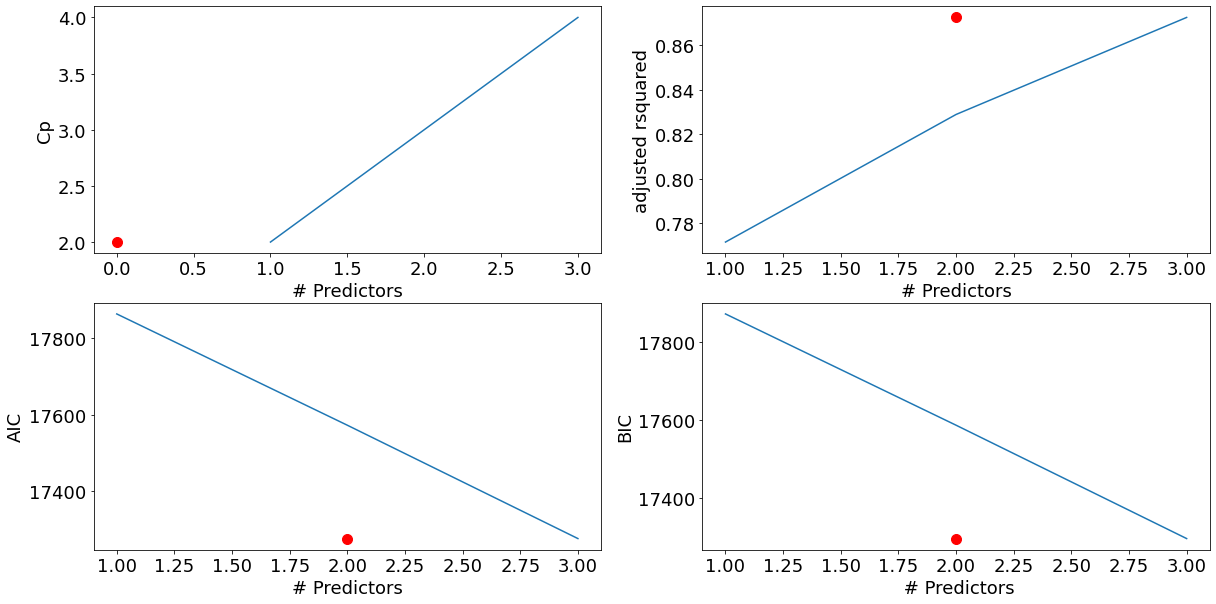

In [48]:
# Plot the result

plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

## Mallow Cp

plt.subplot(2, 2, 1)
Cp= models.apply(lambda row: (row[1].params.shape[0]+(row[1].mse_total-
                               fitted_full_model.mse_total)*(train_x.shape[0]-
                                row[1].params.shape[0])/fitted_full_model.mse_total
                               ), axis=1)
plt.plot(Cp)
plt.plot(Cp.argmin(), Cp.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('Cp')

# adj-rsquared plot
# adj-rsquared = Explained variation / Total variation

adj_rsquared = models.apply(lambda row: row[1].rsquared_adj, axis=1)
plt.subplot(2, 2, 2)
plt.plot(adj_rsquared)
plt.plot(adj_rsquared.argmax(), adj_rsquared.max(), "or")
plt.xlabel('# Predictors')
plt.ylabel('adjusted rsquared')

# aic

aic = models.apply(lambda row: row[1].aic, axis=1)
plt.subplot(2, 2, 3)
plt.plot(aic)
plt.plot(aic.argmin(), aic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('AIC')

# bic

bic = models.apply(lambda row: row[1].bic, axis=1)
plt.subplot(2, 2, 4)
plt.plot(bic)
plt.plot(bic.argmin(), bic.min(), "or")
plt.xlabel(' # Predictors')
plt.ylabel('BIC')

# 전진선택법

In [49]:
########전진선택법(step=1)

def forward(X, y, predictors):
    # 데이터 변수들이 미리정의된 predictors에 있는지 없는지 확인 및 분류
    remaining_predictors = [p for p in X.columns.difference(['const']) if p not in predictors]
    tic = time.time()
    results = []
    for p in remaining_predictors:
        results.append(processSubset(X=X, y= y, feature_set=predictors+[p]+['const']))
    # 데이터프레임으로 변환
    models = pd.DataFrame(results)

    # AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].argmin()] # index
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic))
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model

In [50]:
#### 전진선택법 모델

def forward_model(X,y):
    Fmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    # 미리 정의된 데이터 변수
    predictors = []
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X=X,y=y,predictors=predictors)
        if i > 1:
            if Forward_result['AIC'] > Fmodel_before:
                break
        Fmodels.loc[i] = Forward_result
        predictors = Fmodels.loc[i]["model"].model.exog_names
        Fmodel_before = Fmodels.loc[i]["AIC"]
        predictors = [ k for k in predictors if k != 'const']
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")

    return(Fmodels['model'][len(Fmodels['model'])])

In [51]:
Forward_best_model = forward_model(X=train_x, y= train_y)

Processed  36 models on 1 predictors in 0.038895368576049805
Selected predictors: ['Mfg_Year', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001ED30CDB490>
Processed  35 models on 2 predictors in 0.03789925575256348
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001ED30D548E0>
Processed  34 models on 3 predictors in 0.0329127311706543
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'Weight', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001ED30D545E0>
Processed  33 models on 4 predictors in 0.032912254333496094
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'Weight', 'KM', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001ED30D55AC0>
Processed  32 models on 5 predictors in 0.03390908241271973
Selected predictors: ['Mfg_Year', 'Automatic_airco',

In [52]:
Forward_best_model.aic

16840.42722115371

In [53]:
Forward_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     496.9
Date:                Thu, 17 Dec 2020   Prob (F-statistic):               0.00
Time:                        16:14:54   Log-Likelihood:                -8396.2
No. Observations:                1005   AIC:                         1.684e+04
Df Residuals:                     981   BIC:                         1.696e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Mfg_Year          1302.2034     43.123     30.197      0.000    1217.579    1386.828
Automatic_airco   1990.4264    180.746     11.012      0.000    1635.733    2345.119
Weight              24.5962      1.556     15.806      0.000      21.543      27.650
KM                  -0.0147      0.001    -11.771      0.000      -0.017      -0.012
Petrol            2308.1982    344.583      6.699      0.000    1631.995    2984.402
Quarterly_Tax       12.8436      1.756      7.316      0.000       9.398      16.289
Guarantee_Period    67.1954     14.839      4.528      0.000      38.076      96.314
Powered_Windows    247.1692     81.726      3.024      0.003      86.792     407.546
BOVAG_Guarantee    676.8242    120.429      5.620      0.000     440.496     913.153
Doors             -138.0210     39.796     -3.468      0.001    -216.116     -59.926
Mfr_Guarantee      290.3809     72.770      3.990      0.000     147.577     433.184
cc                  -2.9668      0.529     -5.604      0.000      -4.006      -1.928
HP                  25.3003      5.649      4.478      0.000      14.214      36.386
Backseat_Divider  -262.2294    121.926     -2.151      0.032    -501.495     -22.964
Airco              264.3356     85.744      3.083      0.002      96.073     432.598
Diesel            1356.7435    487.471      2.783      0.005     400.137    2313.350
Metallic_Rim       177.9019     88.147      2.018      0.044       4.925     350.879
Tow_Bar           -143.8838     76.937     -1.870      0.062    -294.864       7.096
CD_Player          155.2427     93.904      1.653      0.099     -29.033     339.518
Boardcomputer     -198.9122    112.088     -1.775      0.076    -418.872      21.047
Airbag_2          -173.1366    101.645     -1.703      0.089    -372.604      26.331
Radio_cassette   -1521.0433    741.039     -2.053      0.040   -2975.248     -66.839
Radio             1391.2744    741.406      1.877      0.061     -63.650    2846.199
const             -2.62e+06   8.59e+04    -30.493      0.000   -2.79e+06   -2.45e+06
==============================================================================
Omnibus:                       99.627   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              624.583
Skew:                           0.161   Prob(JB):                    2.36e-136
Kurtosis:                       6.849   Cond. No.                     2.03e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.03e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 후진소거법

In [54]:
######## 후진선택법(step=1)
def backward(X,y,predictors):
    tic = time.time()
    results = []
    # 데이터 변수들이 미리정의된 predictors 조합 확인
    for combo in itertools.combinations(predictors, len(predictors) - 1):
        results.append(processSubset(X=X, y= y,feature_set=list(combo)+['const']))
    models = pd.DataFrame(results)
    # 가장 낮은 AIC를 가진 모델을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors) - 1, "predictors in",
          (toc - tic))
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model

In [55]:
# 후진 소거법 모델
def backward_model(X, y):
    Bmodels = pd.DataFrame(columns=["AIC", "model"], index = range(1,len(X.columns)))
    tic = time.time()
    predictors = X.columns.difference(['const'])
    Bmodel_before = processSubset(X,y,predictors)['AIC']
    while (len(predictors) > 1):
        Backward_result = backward(X=train_x, y= train_y, predictors = predictors)
        if Backward_result['AIC'] > Bmodel_before:
            break
        Bmodels.loc[len(predictors) - 1] = Backward_result
        predictors = Bmodels.loc[len(predictors) - 1]["model"].model.exog_names
        Bmodel_before = Backward_result['AIC']
        predictors = [ k for k in predictors if k != 'const']

    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    return (Bmodels['model'].dropna().iloc[0])

In [56]:
Backward_best_model = backward_model(X=train_x,y=train_y)

Processed  36 models on 35 predictors in 0.08975911140441895
Selected predictors: ['ABS', 'Age_08_04', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic', 'Automatic_airco', 'BOVAG_Guarantee', 'Backseat_Divider', 'Boardcomputer', 'CD_Player', 'CNG', 'Central_Lock', 'Cylinders', 'Diesel', 'Doors', 'Gears', 'Guarantee_Period', 'HP', 'KM', 'Met_Color', 'Metallic_Rim', 'Mfg_Month', 'Mfg_Year', 'Mfr_Guarantee', 'Mistlamps', 'Petrol', 'Powered_Windows', 'Quarterly_Tax', 'Radio', 'Radio_cassette', 'Sport_Model', 'Tow_Bar', 'Weight', 'cc', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001ED5F7A9610>
Processed  35 models on 34 predictors in 0.07878947257995605
Selected predictors: ['ABS', 'Age_08_04', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic', 'Automatic_airco', 'BOVAG_Guarantee', 'Backseat_Divider', 'Boardcomputer', 'CD_Player', 'CNG', 'Central_Lock', 'Cylinders', 'Diesel', 'Doors', 'Guarantee_Period', 'HP', 'KM', 'Met_Color', 'Metallic_Rim', 'Mfg_Mon

In [57]:
Backward_best_model.aic

16840.427221153703

# 단계적 선택법

In [58]:
def Stepwise_model(X,y):
    Stepmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    predictors = []
    Smodel_before = processSubset(X,y,predictors+['const'])['AIC']
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X=X, y=y, predictors=predictors) # constant added
        print('forward')
        Stepmodels.loc[i] = Forward_result
        predictors = Stepmodels.loc[i]["model"].model.exog_names
        predictors = [ k for k in predictors if k != 'const']
        Backward_result = backward(X=X, y=y, predictors=predictors)
        if Backward_result['AIC']< Forward_result['AIC']:
            Stepmodels.loc[i] = Backward_result
            predictors = Stepmodels.loc[i]["model"].model.exog_names
            Smodel_before = Stepmodels.loc[i]["AIC"]
            predictors = [ k for k in predictors if k != 'const']
            print('backward')
        if Stepmodels.loc[i]['AIC']> Smodel_before:
            break
        else:
            Smodel_before = Stepmodels.loc[i]["AIC"]
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    return (Stepmodels['model'][len(Stepmodels['model'])])

In [59]:
Stepwise_best_model=Stepwise_model(X=train_x,y=train_y)

Processed  36 models on 1 predictors in 0.03989362716674805
Selected predictors: ['Mfg_Year', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001ED5F7951C0>
forward
Processed  1 models on 0 predictors in 0.0019948482513427734
Selected predictors: ['const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001ED5F7BC9A0>
Processed  35 models on 2 predictors in 0.03389763832092285
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001ED5F795E50>
forward
Processed  2 models on 1 predictors in 0.0020241737365722656
Selected predictors: ['Mfg_Year', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001ED5F7826A0>
Processed  34 models on 3 predictors in 0.03487825393676758
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'Weight', 'const']  AIC: <statsmodels.regression.linear_mo

Processed  16 models on 15 predictors in 0.024932384490966797
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'Weight', 'KM', 'Petrol', 'Quarterly_Tax', 'Guarantee_Period', 'Powered_Windows', 'BOVAG_Guarantee', 'Doors', 'Mfr_Guarantee', 'cc', 'HP', 'Airco', 'Diesel', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001ED5F795580>
Processed  20 models on 17 predictors in 0.0329127311706543
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'Weight', 'KM', 'Petrol', 'Quarterly_Tax', 'Guarantee_Period', 'Powered_Windows', 'BOVAG_Guarantee', 'Doors', 'Mfr_Guarantee', 'cc', 'HP', 'Backseat_Divider', 'Airco', 'Diesel', 'Metallic_Rim', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001ED5F7A9880>
forward
Processed  17 models on 16 predictors in 0.025931119918823242
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'Weight', 'KM', 'Petrol', 'Quarterly_Tax', 'Guarantee_Period', 'Powered_Windows', '

backward
Processed  13 models on 24 predictors in 0.02593088150024414
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'Weight', 'KM', 'Petrol', 'Quarterly_Tax', 'Guarantee_Period', 'Powered_Windows', 'BOVAG_Guarantee', 'Doors', 'Mfr_Guarantee', 'cc', 'HP', 'Backseat_Divider', 'Airco', 'Diesel', 'Metallic_Rim', 'Tow_Bar', 'CD_Player', 'Boardcomputer', 'Airbag_2', 'Radio_cassette', 'Radio', 'CNG', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001ED5F784F70>
forward
Processed  24 models on 23 predictors in 0.04089021682739258
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'Weight', 'KM', 'Petrol', 'Quarterly_Tax', 'Guarantee_Period', 'Powered_Windows', 'BOVAG_Guarantee', 'Doors', 'Mfr_Guarantee', 'cc', 'HP', 'Backseat_Divider', 'Airco', 'Diesel', 'Metallic_Rim', 'Tow_Bar', 'CD_Player', 'Boardcomputer', 'Airbag_2', 'Radio_cassette', 'Radio', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000

Processed  24 models on 23 predictors in 0.03789877891540527
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'Weight', 'KM', 'Petrol', 'Quarterly_Tax', 'Guarantee_Period', 'Powered_Windows', 'BOVAG_Guarantee', 'Doors', 'Mfr_Guarantee', 'cc', 'HP', 'Backseat_Divider', 'Airco', 'Diesel', 'Metallic_Rim', 'Tow_Bar', 'CD_Player', 'Boardcomputer', 'Airbag_2', 'Radio_cassette', 'Radio', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001ED4CBFF850>
backward
Processed  13 models on 24 predictors in 0.022939205169677734
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'Weight', 'KM', 'Petrol', 'Quarterly_Tax', 'Guarantee_Period', 'Powered_Windows', 'BOVAG_Guarantee', 'Doors', 'Mfr_Guarantee', 'cc', 'HP', 'Backseat_Divider', 'Airco', 'Diesel', 'Metallic_Rim', 'Tow_Bar', 'CD_Player', 'Boardcomputer', 'Airbag_2', 'Radio_cassette', 'Radio', 'CNG', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001ED5F7

In [60]:
Stepwise_best_model.aic

16840.42722115371

# 성능평가 

In [61]:
# the number of params
print(Forward_best_model.params.shape, Backward_best_model.params.shape, Stepwise_best_model.params.shape)

(24,) (24,) (24,)


In [62]:
# 모델에 의해 예측된/추정된 값 <->  test_y
pred_y_full = fitted_full_model.predict(test_x)
pred_y_forward = Forward_best_model.predict(test_x[Forward_best_model.model.exog_names])
pred_y_backward = Backward_best_model.predict(test_x[Backward_best_model.model.exog_names])
pred_y_stepwise = Stepwise_best_model.predict(test_x[Stepwise_best_model.model.exog_names])

In [63]:
perf_mat = pd.DataFrame(columns=["ALL", "FORWARD", "BACKWARD", "STEPWISE"],
                        index =['MSE', 'RMSE','MAE', 'MAPE'])

In [64]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
from sklearn import metrics

In [65]:
# 성능지표
perf_mat.loc['MSE']['ALL'] = metrics.mean_squared_error(test_y,pred_y_full)
perf_mat.loc['MSE']['FORWARD'] = metrics.mean_squared_error(test_y,pred_y_forward)
perf_mat.loc['MSE']['BACKWARD'] = metrics.mean_squared_error(test_y,pred_y_backward)
perf_mat.loc['MSE']['STEPWISE'] = metrics.mean_squared_error(test_y,pred_y_stepwise)

perf_mat.loc['RMSE']['ALL'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_full))
perf_mat.loc['RMSE']['FORWARD'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_forward))
perf_mat.loc['RMSE']['BACKWARD'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_backward))
perf_mat.loc['RMSE']['STEPWISE'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_stepwise))

perf_mat.loc['MAE']['ALL'] = metrics.mean_absolute_error(test_y, pred_y_full)
perf_mat.loc['MAE']['FORWARD'] = metrics.mean_absolute_error(test_y, pred_y_forward)
perf_mat.loc['MAE']['BACKWARD'] = metrics.mean_absolute_error(test_y, pred_y_backward)
perf_mat.loc['MAE']['STEPWISE'] = metrics.mean_absolute_error(test_y, pred_y_stepwise)

perf_mat.loc['MAPE']['ALL'] = mean_absolute_percentage_error(test_y, pred_y_full)
perf_mat.loc['MAPE']['FORWARD'] = mean_absolute_percentage_error(test_y, pred_y_forward)
perf_mat.loc['MAPE']['BACKWARD'] = mean_absolute_percentage_error(test_y, pred_y_backward)
perf_mat.loc['MAPE']['STEPWISE'] = mean_absolute_percentage_error(test_y, pred_y_stepwise)

print(perf_mat)

              ALL      FORWARD     BACKWARD     STEPWISE
MSE   6.01221e+06  6.08885e+06  6.08885e+06  6.08885e+06
RMSE      2451.98      2467.56      2467.56      2467.56
MAE       942.511      951.358      951.358      951.358
MAPE      8.79523      8.88634      8.88634      8.88634


In [66]:
print(len(fitted_full_model.params))
print(len(Forward_best_model.params))
print(len(Backward_best_model.params))
print(len(Stepwise_best_model.params))


37
24
24
24


In [67]:
fitted_full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     344.1
Date:                Thu, 17 Dec 2020   Prob (F-statistic):               0.00
Time:                        16:17:16   Log-Likelihood:                -8394.5
No. Observations:                1005   AIC:                         1.686e+04
Df Residuals:                     971   BIC:                         1.702e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ABS                -63.2338    131.342     -0.481      0.630    -320.980     194.513
Age_08_04         -109.6459      3.814    -28.749      0.000    -117.130    -102.161
Airbag_1          -129.3426    276.664     -0.468      0.640    -672.270     413.585
Airbag_2          -145.9356    133.002     -1.097      0.273    -406.940     115.069
Airco              278.2351     89.239      3.118      0.002     103.111     453.359
Automatic           31.7144    150.520      0.211      0.833    -263.667     327.096
Automatic_airco   1995.6861    193.944     10.290      0.000    1615.089    2376.283
BOVAG_Guarantee    674.1426    122.478      5.504      0.000     433.791     914.494
Backseat_Divider  -269.1453    131.930     -2.040      0.042    -528.047     -10.244
Boardcomputer     -202.0601    115.373     -1.751      0.080    -428.469      24.349
CD_Player          153.0421     96.151      1.592      0.112     -35.645     341.730
CNG              -1244.1580    240.762     -5.168      0.000   -1716.632    -771.684
Central_Lock       -63.3255    149.966     -0.422      0.673    -357.621     230.970
Cylinders           -0.0427      0.003    -16.547      0.000      -0.048      -0.038
Diesel             183.2459    319.578      0.573      0.567    -443.897     810.389
Doors             -122.4756     42.359     -2.891      0.004    -205.601     -39.350
Gears               37.5224    196.227      0.191      0.848    -347.555     422.600
Guarantee_Period    67.0900     15.032      4.463      0.000      37.591      96.589
HP                  25.9660      6.076      4.274      0.000      14.043      37.889
KM                  -0.0147      0.001    -11.494      0.000      -0.017      -0.012
Met_Color           18.6132     75.584      0.246      0.806    -129.714     166.940
Metallic_Rim       191.6854     93.874      2.042      0.041       7.467     375.904
Mfg_Month          -99.4184     10.271     -9.680      0.000    -119.573     -79.263
Mfg_Year            -3.9720      1.060     -3.746      0.000      -6.053      -1.891
Mfr_Guarantee      291.2993     73.948      3.939      0.000     146.183     436.416
Mistlamps          -47.2036    107.861     -0.438      0.662    -258.871     164.464
Petrol            1060.9014    234.608      4.522      0.000     600.504    1521.299
Power_Steering     -13.6803    329.370     -0.042      0.967    -660.039     632.678
Powered_Windows    319.0397    150.066      2.126      0.034      24.549     613.531
Quarterly_Tax       12.8548      1.804      7.125      0.000       9.314      16.395
Radio             1481.7857    759.274      1.952      0.051      -8.222    2971.793
Radio_cassette   -1608.9944    756.783     -2.126      0.034   -3094.113    -123.875
Sport_Model         75.7369     91.419      0.828      0.408    -103.665     255.139
Tow_Bar           -138.

In [68]:
Stepwise_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     496.9
Date:                Thu, 17 Dec 2020   Prob (F-statistic):               0.00
Time:                        16:17:17   Log-Likelihood:                -8396.2
No. Observations:                1005   AIC:                         1.684e+04
Df Residuals:                     981   BIC:                         1.696e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Mfg_Year          1302.2034     43.123     30.197      0.000    1217.579    1386.828
Automatic_airco   1990.4264    180.746     11.012      0.000    1635.733    2345.119
Weight              24.5962      1.556     15.806      0.000      21.543      27.650
KM                  -0.0147      0.001    -11.771      0.000      -0.017      -0.012
Petrol            2308.1982    344.583      6.699      0.000    1631.995    2984.402
Quarterly_Tax       12.8436      1.756      7.316      0.000       9.398      16.289
Guarantee_Period    67.1954     14.839      4.528      0.000      38.076      96.314
Powered_Windows    247.1692     81.726      3.024      0.003      86.792     407.546
BOVAG_Guarantee    676.8242    120.429      5.620      0.000     440.496     913.153
Doors             -138.0210     39.796     -3.468      0.001    -216.116     -59.926
Mfr_Guarantee      290.3809     72.770      3.990      0.000     147.577     433.184
cc                  -2.9668      0.529     -5.604      0.000      -4.006      -1.928
HP                  25.3003      5.649      4.478      0.000      14.214      36.386
Backseat_Divider  -262.2294    121.926     -2.151      0.032    -501.495     -22.964
Airco              264.3356     85.744      3.083      0.002      96.073     432.598
Diesel            1356.7435    487.471      2.783      0.005     400.137    2313.350
Metallic_Rim       177.9019     88.147      2.018      0.044       4.925     350.879
Tow_Bar           -143.8838     76.937     -1.870      0.062    -294.864       7.096
CD_Player          155.2427     93.904      1.653      0.099     -29.033     339.518
Boardcomputer     -198.9122    112.088     -1.775      0.076    -418.872      21.047
Airbag_2          -173.1366    101.645     -1.703      0.089    -372.604      26.331
Radio_cassette   -1521.0433    741.039     -2.053      0.040   -2975.248     -66.839
Radio             1391.2744    741.406      1.877      0.061     -63.650    2846.199
const             -2.62e+06   8.59e+04    -30.493      0.000   -2.79e+06   -2.45e+06
==============================================================================
Omnibus:                       99.627   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              624.583
Skew:                           0.161   Prob(JB):                    2.36e-136
Kurtosis:                       6.849   Cond. No.                     2.03e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.03e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""